### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

1. $p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$ is a Gaussian distribution. If I integrate this from negative infinity to positive infinity, I see that it equals 1, so it is normalized. For a half-Gaussian to be normalized, we simply multiply the full Gaussian by 2, that way the integral from 0 to infinity yields 1. This works because a Gaussian is an even function. A half Gaussian is thus: $$p(x|\mu,\sigma) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$$.

2. $ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx =  \int_0^\infty x^3 \frac{\sigma\sqrt{2\pi}}{2} f(x) dx $, where f(x) refers to the half-Gaussian whose mean is zero. 

<span style="color:red">Excellent.</span>

In [80]:
#Part 3:
import scipy
import math
import numpy as np
mu=0 #Setting average and standard deviation to 0 and 3, respectively 
sigma=3
Number_Draws=0 #Initializing Variables
Accepted_Samples=[]
Integral=0
N=10**5

"""I randomly sample from a normal distribution, accepting a value if it is positive. 
I keep drawing until I have 10^5 draws completed. I was at first unsure whether you
wanted 10^5 draws, or 10^5 accepted draws, though it says to complete 10^5 draws, then mask them,
so I took this to mean there should be 10^5 total draws, not 10^5 accepted draws. """
while Number_Draws<N:
    Random_Value=np.random.normal(mu,sigma) #Sample from normal distribution, accept positive draws
    if Random_Value>0:
        Accepted_Samples.append(Random_Value) #Load into samples list if accepted 
    Number_Draws=Number_Draws+1

#We have integral g(x) f(x) dx is aprrox. (1/Number_Samples_Used) * Sum f(x), where g(x) is our distribution we draw from. 
#I found this f(x) via dividing the integrand by a half Gaussian. 
def f(x): 
    return (x**3)*sigma*math.sqrt(2*math.pi)*0.5 #Factor of 0.5 is because we have a half-Gaussian

#Conducting the Monte Carlo integration (the sum part)
for element in Accepted_Samples:
    Integral=Integral+f(element)/len(Accepted_Samples)

#Print value we found and the exact value. We see they closely match. 
print("Monte Carlo Value: ")
print(Integral)
print("Exact Value: ")
print(2*sigma**4)

Monte Carlo Value: 
161.88521928474583
Exact Value: 
162


<span style="color:red">Fair point about the total draws versus accepted draws question. However, take a look at the following code. Something that will really help with your coding is to learn python and numpy's vectorizing abilities. Python becomes alot faster by minimizing the usages of for loops.</span>

In [ ]:
# Steve solution
def monte_carlo_integral(sigma):
    x = np.random.normal(0.0,sigma,100000)
    mask = x >= 0.
    x = x[mask]
    return np.mean(x**3) * 0.5 * np.sqrt(2.0*np.pi*sigma**2)

In [81]:
#Part 4:
import scipy
import math
import numpy as np
N_List=[10**2,10**3,10**4] #Initializing a list containing values for N
N_100_Integral_Value_List=[] #Initializing lists to hold values of integral using these values of N
N_1000_Integral_Value_List=[]
N_10000_Integral_Value_List=[]

for N in N_List: #For each value of N, we do the integral 100 times, storing the results in lists 
    Batches_Done=0
    Number_Batches_Needed=100
    while Batches_Done<Number_Batches_Needed: #Keep going until 100 batches done 
        """I randomly sample from a normal distribution, accepting a value if it is positive. 
        I keep drawing until I have 10^5 draws completed. I was at first unsure whether you
        wanted 10^5 draws, or 10^5 accepted draws, though it says to complete 10^5 draws, then mask them,
        so I took this to mean there should be 10^5 total draws, not 10^5 accepted draws. """
        mu=0 #Setting average and standard deviation to 0 and 3, respectively 
        sigma=3
        Number_Draws=0 #Initializing Variables
        Accepted_Samples=[]
        Integral=0
        while Number_Draws<N:
            Random_Value=np.random.normal(mu,sigma) #Sample from normal distribution 
            if Random_Value>0:
                Accepted_Samples.append(Random_Value) #Load into samples list if accepted 
            Number_Draws=Number_Draws+1
        
        #We have integral g(x) f(x) dx is aprrox. (1/Number_Samples_Used) * Sum f(x), where g(x) is our distribution we draw from. 
        #I found this f(x) via dividing the integrand by a half Gaussian. 
        def f(x): 
            return (x**3)*sigma*math.sqrt(2*math.pi)*0.5 #Factor of 0.5 is because we have a half-Gaussian
        
        #Conducting the Monte Carlo integration (the sum part)
        for element in Accepted_Samples:
            Integral=Integral+f(element)/len(Accepted_Samples)

        #Deciding which list to append the integral value to, based on the value of N
        if N==100:
            N_100_Integral_Value_List.append(Integral)
        if N==1000:
            N_1000_Integral_Value_List.append(Integral)
        if N==10000:
            N_10000_Integral_Value_List.append(Integral)
        Batches_Done=Batches_Done+1


<span style="color:red">Your code definitely resembles C, but Python can be much more compact and faster through array vectorizing.</span>

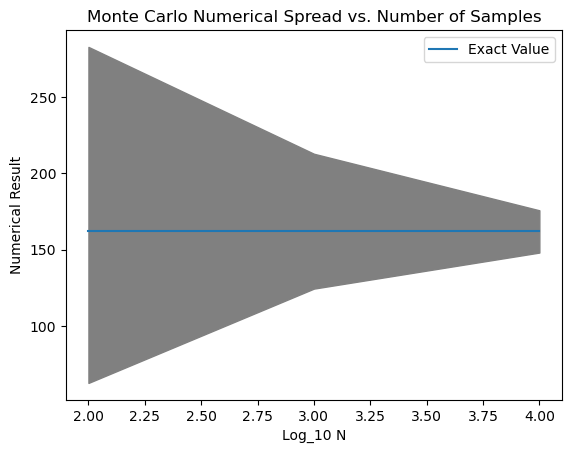

In [83]:
from matplotlib import pyplot as plt
Log10_N=np.log10([100,1000,10000]) #Taking base 10 log of values of N used 
N_100_Minimum=np.min(N_100_Integral_Value_List) #Finding minimum and maximum values for the integral found with each value of N used 
N_100_Maximum=np.max(N_100_Integral_Value_List)
N_1000_Minimum=np.min(N_1000_Integral_Value_List)
N_1000_Maximum=np.max(N_1000_Integral_Value_List)
N_10000_Minimum=np.min(N_10000_Integral_Value_List)
N_10000_Maximum=np.max(N_10000_Integral_Value_List)
Exact_Value=2*(3**4) #Exact value for the integral we are approximating 
Exact_Value_List=[] #Here I am making a list so I can put this exact value on the plot as a horizontal line. 
for element in Log10_N:
    Exact_Value_List.append(Exact_Value)
Max_List=[N_100_Maximum, N_1000_Maximum, N_10000_Maximum]
Min_List=[N_100_Minimum, N_1000_Minimum, N_10000_Minimum]
plt.fill_between(Log10_N, Min_List, Max_List,color='grey')
plt.plot(Log10_N, Exact_Value_List, label="Exact Value") #plot the exact value, adding a label for it 
plt.xlabel("Log_10 N")
plt.ylabel("Numerical Result")
plt.title("Monte Carlo Numerical Spread vs. Number of Samples")
plt.legend() #Making the legend appear 

I see that this converges nicely to the desired result as N gets larger. This is a good sign! 

<span style="color:red">Great!</span>

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Ten Random Draws: 
[ 88.93911483 114.62259935 111.83626408  90.04550148  79.38537706
 109.34229243 104.48206255  96.78219863  97.09200062 108.24773869]
PDF At 145: 
0.0002954565607958672


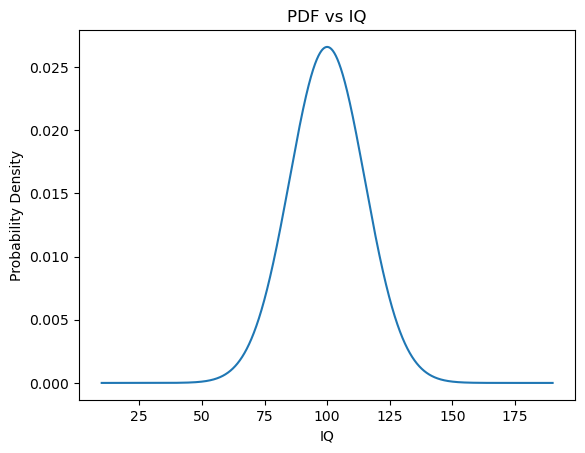

In [4]:
import scipy
mu=100 #The mean 
sigma=15 #Standard deviation 
xgrid = np.linspace(100-6*sigma,100+6*sigma, 10**4) #x values for plot, +- 6 sigma from mean 
distribution = scipy.stats.norm(loc=100,scale=15) #Make distribution as an object 
plt.plot(xgrid, distribution.pdf(xgrid)) # plotting the distribution 
plt.xlabel("IQ")
plt.ylabel("Probability Density")
plt.title("PDF vs IQ")

#Ten random draws 
print("Ten Random Draws: ")
print(distribution.rvs(10))
print("PDF At 145: ")
print(distribution.pdf(145))

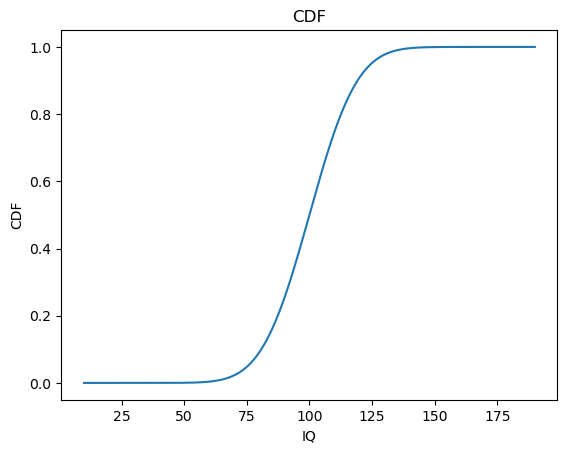

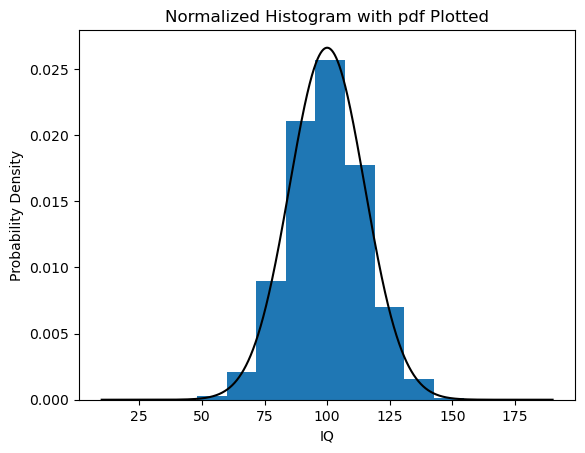

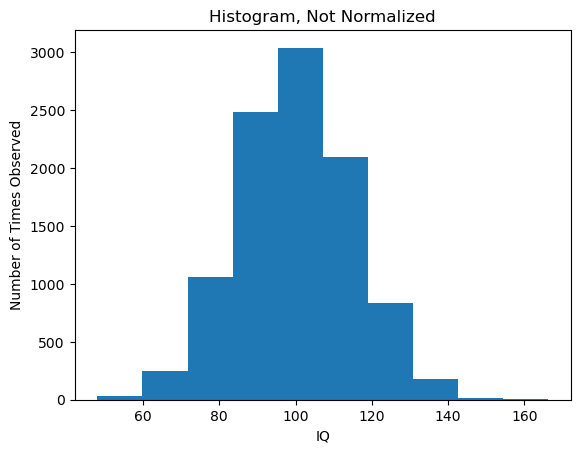

In [5]:
CDF=distribution.cdf(xgrid) #Plotting the CDF 
plt.plot(xgrid, CDF)
plt.title("CDF")
plt.xlabel("IQ")
plt.ylabel("CDF")
plt.show()
plt.clf() #Clearing the figure so I can plot something else 

"""Note that I set density = True so it would normalize the histogram! If I do not do this, 
and plot the pdf over this, they have very different y axis values, because the histogram is
not normalized. If I don't normlize the histogram, you won't be able to readily see the pdf."""
randomvals=np.random.uniform(0,1,10**4) #Random sampling uniform dist so I can feed this in ppf 
plt.hist(distribution.ppf(randomvals), density=True) #Make histogram 
plt.plot(xgrid, distribution.pdf(xgrid), color='k') # plotting the dist
plt.xlabel("IQ")
plt.ylabel("Probability Density")
plt.title("Normalized Histogram with pdf Plotted")
plt.show()
plt.clf()

plt.hist(distribution.ppf(randomvals)) #Plotting un-normalized histogram separately so you can see it 
plt.xlabel("IQ")
plt.ylabel("Number of Times Observed")
plt.title("Histogram, Not Normalized")
plt.show()


In [6]:
#Finding the odds of an IQ of 145 or above
IQ145=distribution.cdf(145) #Probability of IQ <= 145 
print("Fraction of people having an IQ of 145 or above: ")
print(1-IQ145) #subtract the variable from 1 to get the value we want 
IQ_1_in_a_Million=distribution.ppf(1-10**(-6)) #Gives IQ so probability of this or higher IQ is 1/1000000
print("One in one a million people have an IQ of this value, or higher: ")
print(IQ_1_in_a_Million)

Fraction of people having an IQ of 145 or above: 
0.0013498980316301035
One in one a million people have an IQ of this value, or higher: 
171.3013646322563


<span style="color:red">Excellent. Or use the inverse survival function to compute this.</span>

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

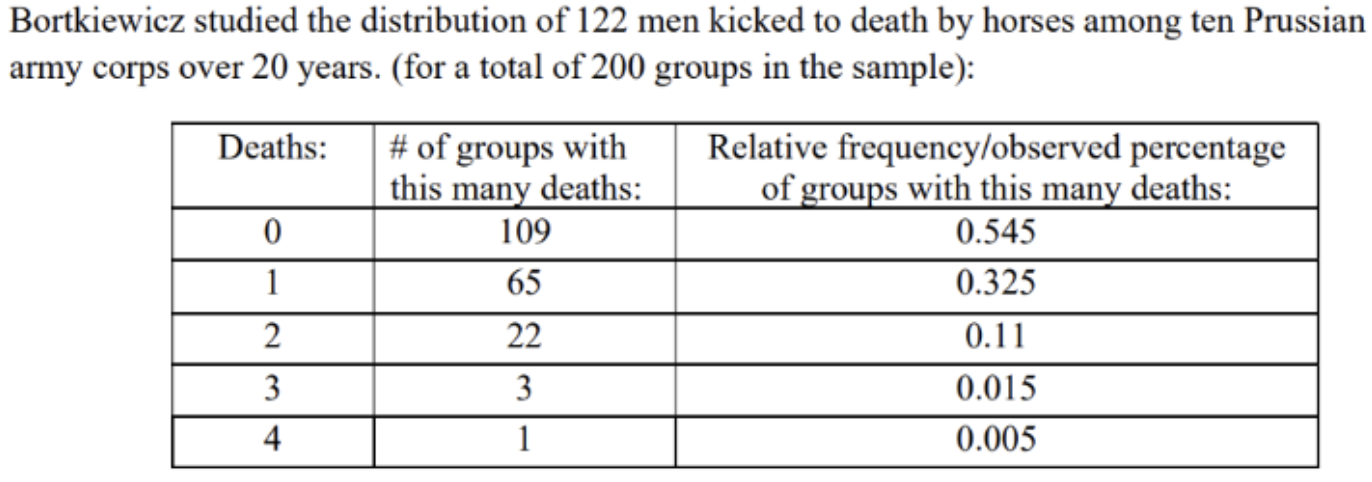

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

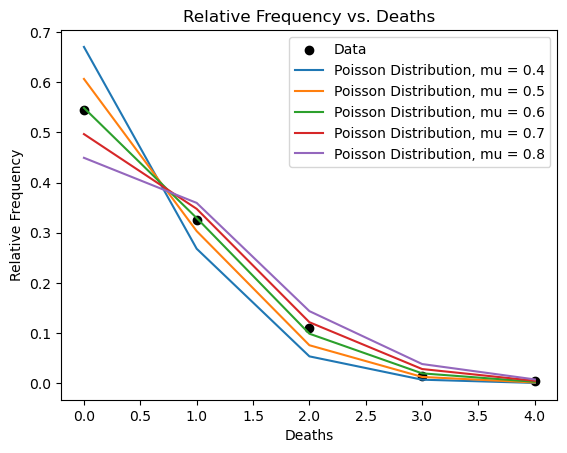

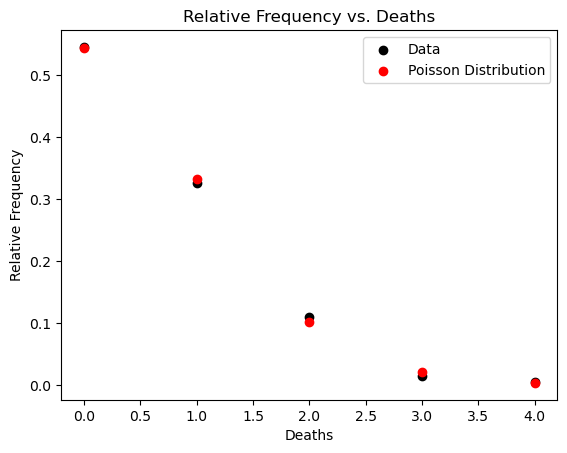

In [79]:
from scipy.stats import poisson as Distribution 
Deaths=[0,1,2,3,4]
Relative_Frequency=[0.545,0.325,0.11,0.015,0.005]
plt.scatter(Deaths, Relative_Frequency, color='k', label="Data")
plt.xlabel("Deaths")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency vs. Deaths")

#Here I make several Poisson distributions with different values for mu and plot them alongisde the data. 
PoissonDist1 = Distribution.pmf(Deaths, mu=0.4, loc=0)
plt.plot(Deaths, PoissonDist1, label="Poisson Distribution, mu = 0.4")
PoissonDist2 = Distribution.pmf(Deaths, mu=0.5, loc=0)
plt.plot(Deaths, PoissonDist2, label="Poisson Distribution, mu = 0.5")
PoissonDist3 = Distribution.pmf(Deaths, mu=0.6, loc=0)
plt.plot(Deaths, PoissonDist3, label="Poisson Distribution, mu = 0.6")
PoissonDist4 = Distribution.pmf(Deaths, mu=0.7, loc=0)
plt.plot(Deaths, PoissonDist4, label="Poisson Distribution, mu = 0.7")
PoissonDist5 = Distribution.pmf(Deaths, mu=0.8, loc=0)
plt.plot(Deaths, PoissonDist5, label="Poisson Distribution, mu = 0.8")
plt.legend()
plt.show()
plt.clf() #Clear figure so I can make a new plot 

#Plotting data alongside the Poisson dist. for the value of mu that I thought fit the data best. 
plt.scatter(Deaths, Relative_Frequency, color='k', label="Data")
plt.xlabel("Deaths")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency vs. Deaths")

#Here I varied the value of mu until the Poisson dist. visually matched the data.
#They match so closely it is hard to tell them apart. 
PoissonDistFitted = Distribution.pmf(Deaths, mu=0.61, loc=0)
plt.scatter(Deaths, PoissonDistFitted, color='r', label="Poisson Distribution")
plt.legend()
plt.show()

<span style="color:red">This is spot on the right answer, but visual iteration is not how I expected this to be deduced. You can perform a weighted mean of the data, i.e., by summing the number of deaths times their relative frequency, you get a weighted mean of 0.61. -4 points.</span>